## Quantum Encoding for QG Dataset ##
Using angular encoding

TODO: 
- Fix absolute path
- Try amplitude encoding

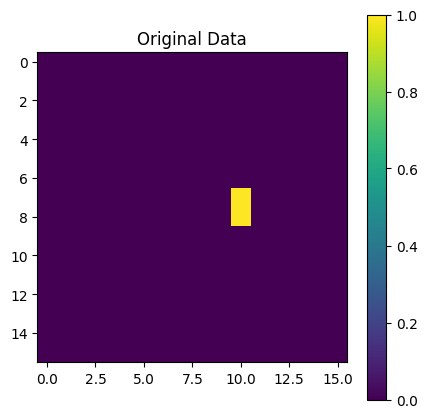

(8, 8, 4)


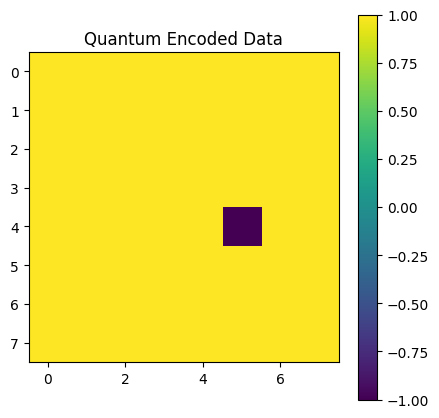

(8, 8)


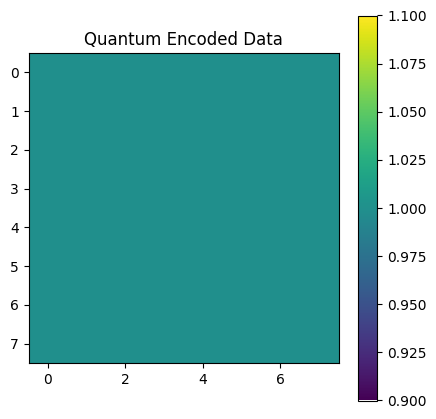

(8, 8)


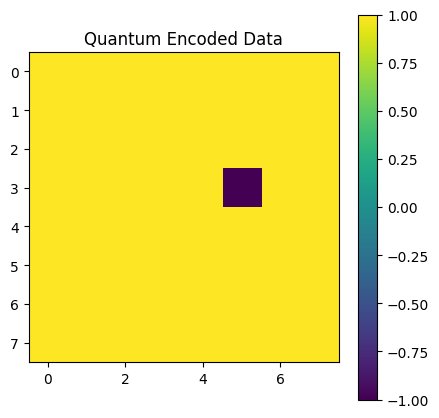

(8, 8)


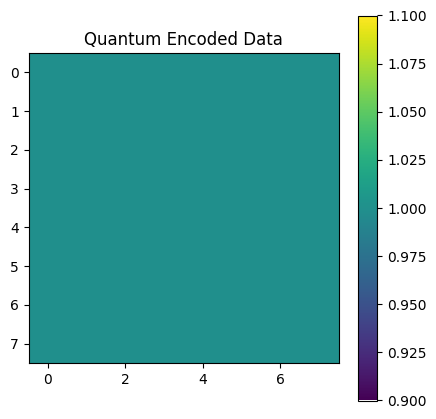

In [13]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib
import pennylane as qml
from pennylane.templates import RandomLayers

# filename="C:/Users/realc/OneDrive/Documents/GSOC/data/small_QG_train_normalized_5"
filename = "C:/Users/realc/OneDrive/Documents/GSOC/data/QG_train_normalized_16_xl"

file = h5py.File(filename,"r")

# plt.imshow(np.mean(file['X'], axis=0), norm=matplotlib.colors.LogNorm())
# plt.colorbar()

data_X = np.array(file['X'])

num_qubits = 16
dev = qml.device("default.qubit", wires=num_qubits)
n_layers = 1
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def angle_circuit(phi):
    for j in range(4):
        qml.RX(np.pi * phi[j], wires=j)
    # RandomLayers(rand_params, wires=list(range(4)))
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

def angle_encoding(data, sample=0):
    out = np.zeros((8, 8, 4))

    for i in range(0, 16, 2):
        for j in range(0, 16, 2):
            q_results = angle_circuit(
                [
                    data[sample, i, j],
                    data[sample, i, j+1],
                    data[sample, i+1, j],
                    data[sample, i+1, j+1]
                ]
            )
            for c in range(4):
                out[i//2, j//2, c] = q_results[c]
    return out

def visualize_data(original_data, encoded_data, sample_index=0):
    # original_mean = np.mean(original_data, axis=0)
    original_mean = original_data[0]

    plt.figure(figsize=(5, 5))
    # plt.imshow(original_data[sample_index], cmap='viridis')
    plt.imshow(original_mean, cmap='viridis')
    plt.title("Original Data")
    plt.colorbar()
    plt.show()

    encoded_image = encoded_data
    for channel in range(4):
        print(encoded_image.shape)
        encoded_image = encoded_data[:, :, channel]

        plt.figure(figsize=(5, 5))
        plt.imshow(encoded_image, cmap='viridis')
        plt.title("Quantum Encoded Data")
        plt.colorbar()
        plt.show()

encoded_data = []
num_samples = len(data_X)
num_samples = 2
for sample in range(num_samples):
    encoded_data.append(angle_encoding(data_X, sample))
encoded_data = np.array(encoded_data)

visualize_data(data_X, encoded_data[0], sample_index=0)
